<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [4]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=42, stratify=y_train_all)

In [5]:
print('shape of x_train: {}'.format(x_train.shape))
print('shape of y_train: {}'.format(y_train.shape))
print('shape of x_val: {}'.format(x_val.shape))
print('shape of x_test: {}'.format(x_test.shape))

shape of x_train: (364, 30)
shape of y_train: (364,)
shape of x_val: (91, 30)
shape of x_test: (114, 30)


In [26]:
class SingleLayer:
  def __init__(self, learning_rate=0.1, l2=0):
    self.w = None # hidden layer의 노드가 한개인 셈이므로 벡터라이제이션해도 w는 아직 (1, nx)
    self.b = None
    self.lr = learning_rate
    self.w_history = []
    self.l2_lambda = l2
    self.cost_history = []
    self.val_cost_history = []

  def initialization(self, X):
    self.w = np.ones(X.shape[1]) # 여기는 np.ones(x.shape[1]) 가 아니다! 즉 두개는 서로 다른 shape의 ndarray다
    # 나는 왜 ((1, X.shape[1])) 로 하니까 에러가 나지? 브로드캐스트가 안된다는데 왜 안되는건디
    self.b = 0
    return self.w, self.b

  def forward_prop(self, X):
    Z = np.dot(X, self.w.T) + self.b
    A = self.sigmoid(Z)
    return A
  
  def sigmoid(self, Z):
    A = 1 / (1 + np.exp(-Z))
    return A

  def backward_prop(self, X, Y, A):
    dw = np.dot((A - Y).T, X) / X.shape[0] + self.l2_lambda * self.w
    db = np.sum(A - Y) / X.shape[0]
    return dw, db

  def calcul_cost(self, Y, A):
    A = np.clip(A, 1e-10, 1-1e-10)
    L = -(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + self.l2_lambda * np.sum(self.w **2) / 2
    cost = np.sum(L) / Y.shape[0]
    return cost

  def fit(self, X, Y, epoches=100, X_val=None, Y_val=None):
    self.w, self.b = self.initialization(X)
    for i in range(epoches):
      A = self.forward_prop(X)
      dw, db = self.backward_prop(X, Y, A)
      self.w -= self.lr * dw
      self.b -= self.lr * db
      self.w_history.append(self.w.copy())
      cost = self.calcul_cost(Y, A)
      self.cost_history.append(cost)
      self.update_val(X_val, Y_val)
      if i%1000 == 0:
        print('processing.... epoches: {}'.format(i))

  def update_val(self, X_val, Y_val):
    A = self.forward_prop(X_val)
    cost = self.calcul_cost(Y_val, A)
    self.val_cost_history.append(cost)

  def predict(self, X, Y):
    A = self.forward_prop(X)
    return A > 0.5

  def score(self, X, Y):
    Y_hat = self.predict(X, Y)
    score = np.mean(Y_hat == Y)
    return score

In [27]:
from sklearn.preprocessing import StandardScaler
# StandarScaler 는 평균0, 표준편차1이 되도록 normalization 해준다.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [28]:
layer = SingleLayer(l2=0.001)
layer.fit(x_train_scaled, y_train, X_val=x_val_scaled, Y_val=y_val, epoches=10000)
layer.score(x_val_scaled, y_val)

processing.... epoches: 0
processing.... epoches: 1000
processing.... epoches: 2000
processing.... epoches: 3000
processing.... epoches: 4000
processing.... epoches: 5000
processing.... epoches: 6000
processing.... epoches: 7000
processing.... epoches: 8000
processing.... epoches: 9000


0.978021978021978

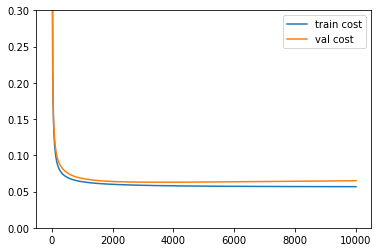

In [34]:
plt.ylim(0, 0.3)
plt.plot(layer.cost_history)
plt.plot(layer.val_cost_history)
plt.legend(['train cost', 'val cost'])
plt.show()

In [33]:
x_test_scaled = scaler.transform(x_test)
layer.score(x_test_scaled, y_test)

0.9649122807017544

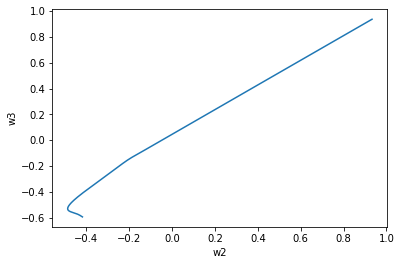

In [35]:
w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.xlabel('w2')
plt.ylabel('w3')
plt.show()